# Simple road segment

In [1]:
%matplotlib inline

import cvxpy as cvx
import dccp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Defining the scene

In [2]:
a, b, c, d, e, f = np.array([0.5, 0.]), np.array([1., 0.5]), np.array([1., 1.5]), np.array([0., 1.5]), np.array([-0.5, 1.]), np.array([-0.5, 0.])
p1, p2, p3, p4, p5, p6 = np.array([1., 0.]), np.array([1., 1.]), _, np.array([0., 1.]), _, np.array([0., 0.])

obstacles = []
r1, r2 = 0.6, 0.4
dx = 0.05

n1, n2, n3, n4, n5, n6 = 50, 80, 50, 50, 50, 80

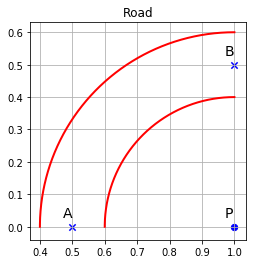

In [3]:
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)


road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=2);

for o, r in obstacles:
    circle = plt.Circle(o, r, color='orange')
    plt.gca().add_artist(circle)

plt.axis('equal');
plt.grid(True)
plt.title("Road");


plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.axis('scaled');

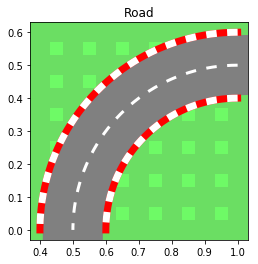

In [4]:
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)


road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_center_x, road_center_y, "grey", linewidth=60);
plt.plot(road_center_x, road_center_y, "w--", linewidth=3, dashes=(3.5, 3.5));
plt.plot(road_top_x, road_top_y, "r", linewidth=7);
plt.plot(road_top_x, road_top_y, "w--", linewidth=7, dashes=(1.5, 1.5));
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=7);
plt.plot(road_bottom_x, road_bottom_y, "w--", linewidth=7, dashes=(1.5, 1.5));

for o, r in obstacles:
    circle = plt.Circle(o, r, color='orange')
    plt.gca().add_artist(circle)

plt.axis('equal');
plt.grid(True)
plt.title("Road");

plt.gca().set_facecolor((0.43, 0.98, 0.4))
plt.grid(True, color=(0.42, 0.87, 0.39), linewidth=20)
plt.axis('scaled');

## Solver

In [5]:
a, b = np.array([0.5, 0.]), np.array([1., 0.5])
p1 = np.array([1., 0.])

obstacles = []
r1, r2 = 0.6, 0.4
dx = 0.05

n1 = 50
eps = 0.005

In [6]:
x1 = cvx.Variable((n1+1, 2))

In [7]:
constr = [x1[0] == a, x1[n1] == b]

v1 = x1[1:] - x1[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - p1) >= r2 + eps)

In [8]:
total_v = cvx.norm(v1, "fro")

prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.is_dcp()

False

In [9]:
prob.solve(method="dccp");

In [10]:
traj = np.r_[x1.value]
traj

array([[ 5.00000000e-01, -1.35850741e-14],
       [ 5.08386508e-01,  1.15788802e-02],
       [ 5.16773017e-01,  2.31577603e-02],
       [ 5.25159526e-01,  3.47366403e-02],
       [ 5.33546036e-01,  4.63155203e-02],
       [ 5.41932548e-01,  5.78944000e-02],
       [ 5.50319061e-01,  6.94732796e-02],
       [ 5.58705576e-01,  8.10521589e-02],
       [ 5.67092093e-01,  9.26310378e-02],
       [ 5.75478613e-01,  1.04209916e-01],
       [ 5.83865135e-01,  1.15788794e-01],
       [ 5.92251661e-01,  1.27367671e-01],
       [ 6.00638188e-01,  1.38946547e-01],
       [ 6.09024718e-01,  1.50525423e-01],
       [ 6.17411248e-01,  1.62104298e-01],
       [ 6.25797779e-01,  1.73683173e-01],
       [ 6.34184308e-01,  1.85262049e-01],
       [ 6.42570836e-01,  1.96840926e-01],
       [ 6.50957361e-01,  2.08419803e-01],
       [ 6.59343887e-01,  2.19998681e-01],
       [ 6.67730415e-01,  2.31577557e-01],
       [ 6.76116860e-01,  2.43156491e-01],
       [ 6.84901572e-01,  2.54437355e-01],
       [ 6.

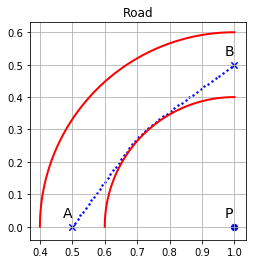

In [11]:
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)


road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=2);

for o, r in obstacles:
    circle = plt.Circle(o, r, color='orange')
    plt.gca().add_artist(circle)

plt.axis('equal');
plt.grid(True)
plt.title("Road");


plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(traj[:, 0], traj[:, 1], s=2, color="blue")

plt.axis('scaled');

## Repeat the experiment with different road widths

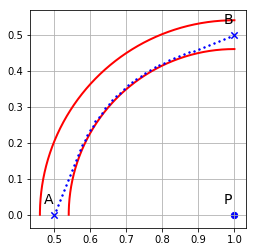

In [12]:
a, b = np.array([0.5, 0.]), np.array([1., 0.5])
p1 = np.array([1., 0.])
obstacles = []
r1, r2 = 0.54, 0.46
dx = 0.05
n1 = 50
eps = 0.005

x1 = cvx.Variable((n1+1, 2))
constr = [x1[0] == a, x1[n1] == b]
v1 = x1[1:] - x1[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - p1) >= r2 + eps)
    
total_v = cvx.norm(v1, "fro")
prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.solve(method="dccp");
traj = np.r_[x1.value]
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=2);

plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(traj[:, 0], traj[:, 1], s=2, color="blue", zorder=10)

plt.grid(True)
plt.axis('scaled');

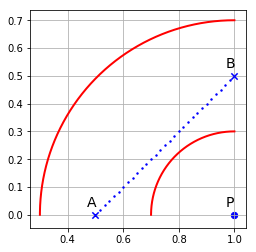

In [13]:
a, b = np.array([0.5, 0.]), np.array([1., 0.5])
p1 = np.array([1., 0.])
obstacles = []
r1, r2 = 0.7, 0.3
dx = 0.05
n1 = 30
eps = 0.005

x1 = cvx.Variable((n1+1, 2))
constr = [x1[0] == a, x1[n1] == b]
v1 = x1[1:] - x1[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - p1) >= r2 + eps)
    
total_v = cvx.norm(v1, "fro")
prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.solve(method="dccp");
traj = np.r_[x1.value]
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=2);

plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(traj[:, 0], traj[:, 1], s=2, color="blue", zorder=10)

plt.grid(True)
plt.axis('scaled');

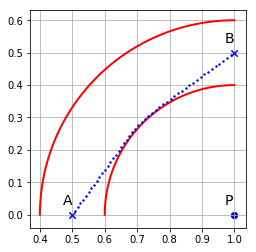

In [14]:
a, b = np.array([0.5, 0.]), np.array([1., 0.5])
p1 = np.array([1., 0.])
obstacles = []
r1, r2 = 0.6, 0.4
dx = 0.05
n1 = 50
eps = 0.005

x1 = cvx.Variable((n1+1, 2))
constr = [x1[0] == a, x1[n1] == b]
v1 = x1[1:] - x1[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - p1) >= r2 + eps)
    
total_v = cvx.norm(v1, "fro")
prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.solve(method="dccp");
traj = np.r_[x1.value]
r_center = (r1 + r2) / 2
theta1 = np.linspace(np.pi/2, np.pi, 500)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=2);

plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(traj[:, 0], traj[:, 1], s=2, color="blue", zorder=10)

plt.grid(True)
plt.axis('scaled');

## Drawing the convex hull of the road segment

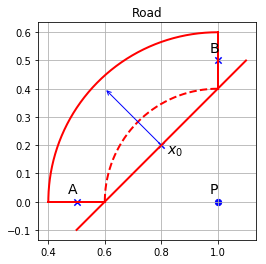

In [16]:
theta1 = np.linspace(np.pi/2, np.pi, 500)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)
road_bottom_x_cvx = np.linspace(0.5, 1.1, 100)
road_bottom_y_cvx = -0.6 + road_bottom_x_cvx

closed_coords = np.linspace(0.4, 0.6, 100)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "r--", linewidth=2);
plt.plot(road_bottom_x_cvx, road_bottom_y_cvx, "r", linewidth=2);
plt.plot([1]*100, closed_coords, "r", linewidth=2);
plt.plot(closed_coords, [0]*100, "r", linewidth=2);

plt.axis('equal');
plt.grid(True)
plt.title("Road");


plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(0.8, 0.2, s=40, color="blue", marker="x")
plt.text(0.82, 0.17, "$x_0$", fontsize=14)

plt.annotate("", xy=(0.6, 0.4), xytext=(0.8, 0.2), arrowprops=dict(arrowstyle="->", color="blue"))

plt.axis('scaled');

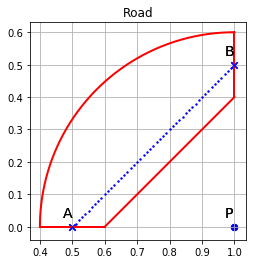

In [17]:
a, b = np.array([0.5, 0.]), np.array([1., 0.5])
p1, x0 = np.array([1., 0.]), np.array([0.8, 0.2])
r1, r2 = 0.6, 0.4
dx = 0.05
n1 = 50

x1 = cvx.Variable((n1+1, 2))
constr = [x1[0] == a, x1[n1] == b]
v1 = x1[1:] - x1[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - x0) >= 0)
    
total_v = cvx.norm(v1, "fro")
prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.solve(method="dccp");
traj = np.r_[x1.value]

theta1 = np.linspace(np.pi/2, np.pi, 500)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)
road_bottom_x_cvx = np.linspace(0.6, 1.0, 100)
road_bottom_y_cvx = -0.6 + road_bottom_x_cvx

closed_coords = np.linspace(0.4, 0.6, 100)

plt.plot(road_top_x, road_top_y, "r", linewidth=2);
plt.plot(road_bottom_x_cvx, road_bottom_y_cvx, "r", linewidth=2);
plt.plot([1]*100, closed_coords, "r", linewidth=2);
plt.plot(closed_coords, [0]*100, "r", linewidth=2);

plt.axis('equal');
plt.grid(True)
plt.title("Road");

plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(0.5, 0., s=40, color="blue", marker="x")
plt.text(0.47, 0.03, "A", fontsize=14)

plt.scatter(1., 0.5, s=40, color="blue", marker="x")
plt.text(0.97, 0.53, "B", fontsize=14)

plt.scatter(1., 0., s=40, color="blue")
plt.text(0.97, 0.03, "P", fontsize=14)

plt.scatter(traj[:, 0], traj[:, 1], s=2, color="blue", zorder=10)

plt.axis('scaled');